In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA

In [2]:
def summ(x):
    percentile=np.percentile(x,[2.5,25,50,75,97.5]).tolist()
    summ=[np.mean(x),np.std(x)]
    summ.extend(percentile)
    summ=DataFrame(summ,index=["mean","sd","2.5%","25%","50%","75%","97.5%"],columns=["param"]).T
    return summ

In [3]:
#data=pd.read_csv("C:\Users\User\Dropbox\BDA3\excercise15.3.csv")
data=pd.read_csv("C:\Users\Tomoki\Documents\Dropbox\BDA3\excercise15.3.csv")

In [4]:
data

,temperature,ratio,contact,conversion
0,1300,7.5,0.0120,49.0
1,1300,9.0,0.0120,50.2
2,1300,11.0,0.0115,50.5
3,1300,13.5,0.0130,48.5
4,1300,17.0,0.0135,47.5
5,1300,23.0,0.0120,44.5
6,1200,5.3,0.0400,28.0
7,1200,7.5,0.0380,31.5
8,1200,11.0,0.0320,34.5
9,1200,13.5,0.0260,35.0


In [48]:
x1=data.ix[:,0]/1000
x2=data.ix[:,1]/10
x3=data.ix[:,2]
X=DataFrame([np.ones(len(data)),x1,x2,x3,x1*x2,x1*x3,x2*x3,np.square(x1),np.square(x2),np.square(x3)]).T
y=data.ix[:,3]

In [49]:
X

,0,1,2,3,4,5,6,7,8,9
0,1,1.3,0.75,0.0120,0.975,0.01560,0.00900,1.69,0.5625,0.000144
1,1,1.3,0.90,0.0120,1.170,0.01560,0.01080,1.69,0.8100,0.000144
2,1,1.3,1.10,0.0115,1.430,0.01495,0.01265,1.69,1.2100,0.000132
3,1,1.3,1.35,0.0130,1.755,0.01690,0.01755,1.69,1.8225,0.000169
4,1,1.3,1.70,0.0135,2.210,0.01755,0.02295,1.69,2.8900,0.000182
5,1,1.3,2.30,0.0120,2.990,0.01560,0.02760,1.69,5.2900,0.000144
6,1,1.2,0.53,0.0400,0.636,0.04800,0.02120,1.44,0.2809,0.001600
7,1,1.2,0.75,0.0380,0.900,0.04560,0.02850,1.44,0.5625,0.001444
8,1,1.2,1.10,0.0320,1.320,0.03840,0.03520,1.44,1.2100,0.001024
9,1,1.2,1.35,0.0260,1.620,0.03120,0.03510,1.44,1.8225,0.000676


In [50]:
k=len(X.T)
n=len(X)
beta_hat=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
V_beta=np.linalg.inv(np.dot(X.T,X))
s2=1./(n-k)*np.dot((y-np.dot(X,beta_hat)),(y-np.dot(X,beta_hat)))

In [51]:
sigma2=[]
beta=[]
for i in range(1000):
    sigma2.append((n-k)*s2/sp.stats.chi.rvs(df=n-k))
    beta.append(np.random.multivariate_normal(beta_hat,V_beta*sigma2[i]))

In [52]:
beta_dataframe=DataFrame(beta)

In [53]:
for i in range(len(beta_dataframe.T)):
    print summ(beta_dataframe.ix[:,i])

              mean           sd          2.5%           25%          50%  \
param -7946.643921  7445.474611 -22193.328213 -12771.099829 -8046.460875   

               75%        97.5%  
param -3170.220741  6910.795848  
               mean           sd          2.5%          25%           50%  \
param  11936.090757  11580.47334 -11287.117626  4489.979759  12023.288494   

                75%         97.5%  
param  19467.852557  34156.876937  
            mean          sd        2.5%         25%         50%         75%  \
param  312.20115  102.086496  122.899579  247.384983  313.818272  376.814022   

            97.5%  
param  519.810694  
               mean            sd          2.5%           25%           50%  \
param  26618.607321  24898.321438 -22318.852922  10906.570556  26866.282674   

                75%         97.5%  
param  42714.190504  74309.146493  
             mean         sd        2.5%        25%         50%         75%  \
param -226.561162  75.832742 -380.902673 

In [54]:
summ(sigma2)

,mean,sd,2.5%,25%,50%,75%,97.5%
param,4.528188,1.581514,2.607792,3.49158,4.234061,5.118811,8.232526


In [55]:
def gibbs(y,X,ite):
    n=len(X)
    sigma2=[1.0]
    tau2=[1.0]
    beta=[]
    beta_n=[]
    J=len(X.T)
    for j in range(J):
        beta.append([0])
        beta_n.append(0)
    for i in range(ite):
        for j in range(J):
            if j==0:
                mu=(np.sum(X.ix[:,j]*y)-np.dot(np.dot(X.T,X.ix[:,j]),beta_n)+beta_n[j]*np.dot(X.ix[:,j],X.ix[:,j]))/np.sum(np.square(X.ix[:,j]))
                var=sigma2[i]/np.sum(np.square(X.ix[:,j]))
                beta[j].append(np.random.normal(mu,np.sqrt(var)))
                beta_n[j]=beta[j][i+1]
            else:
                mu=tau2[i]*(np.sum(X.ix[:,j]*y)-np.dot(np.dot(X.T,X.ix[:,j]),beta_n)+beta_n[j]*np.dot(X.ix[:,j],X.ix[:,j]))/(tau2[i]*np.sum(np.square(X.ix[:,j]))+sigma2[i])
                var=sigma2[i]*tau2[i]/(tau2[i]*np.sum(np.square(X.ix[:,j]))+sigma2[i])
                beta[j].append(np.random.normal(mu,np.sqrt(var)))
                beta_n[j]=beta[j][i+1]
            sigma2.append(1.*n*np.sum(np.square(y-np.dot(X,beta_n)))*0.5/np.random.chisquare(df=n))
            tau2.append(1.*7*np.sum(np.square(beta_n))*0.5/np.random.chisquare(df=7))
    return np.array([beta,sigma2,tau2])

In [56]:
result=gibbs(y,X,1000)

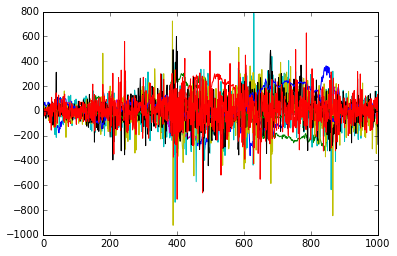

In [57]:
for i in range(len(result[0])):
    plt.plot(result[0][i])

In [58]:
for i in range(len(result[0])):
    print summ(result[0][i][-500:])

           mean          sd        2.5%         25%        50%        75%  \
param -21.21499  134.252282 -230.122331 -123.126084 -29.651123  56.045484   

            97.5%  
param  318.855923  
            mean          sd        2.5%         25%        50%       75%  \
param -88.890803  118.018145 -269.115512 -208.179124 -50.037884  8.336545   

            97.5%  
param  116.249584  
            mean          sd       2.5%        25%      50%        75%  \
param  41.725114  102.314547 -94.690438 -35.963467  5.43093  94.470669   

            97.5%  
param  278.007109  
            mean          sd      2.5%        25%       50%        75%  \
param  12.286731  141.350808 -267.4044 -64.358495  3.182256  92.153132   

           97.5%  
param  298.13961  
            mean         sd       2.5%       25%        50%        75%  \
param  28.688249  57.082571 -79.482787 -7.824103  31.147955  63.373386   

            97.5%  
param  147.935503  
          mean          sd      2.5%        2

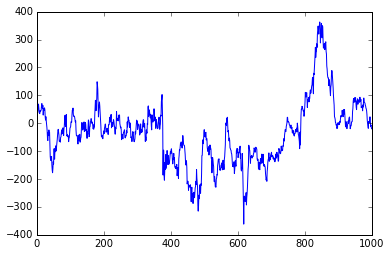

In [59]:
plt.plot(result[0][0])

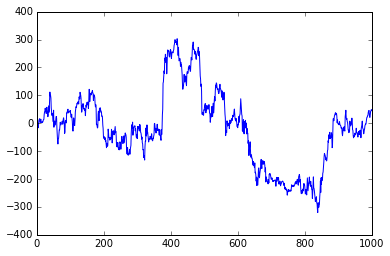

In [60]:
plt.plot(result[0][1])

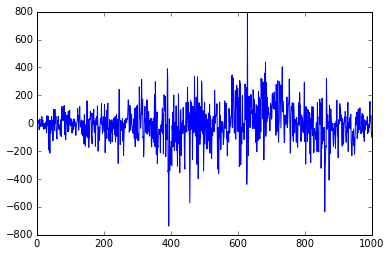

In [61]:
plt.plot(result[0][3])

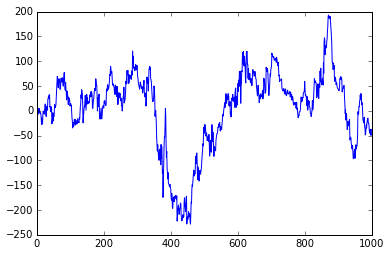

In [62]:
plt.plot(result[0][4])

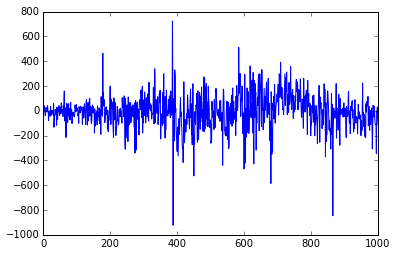

In [63]:
plt.plot(result[0][5])

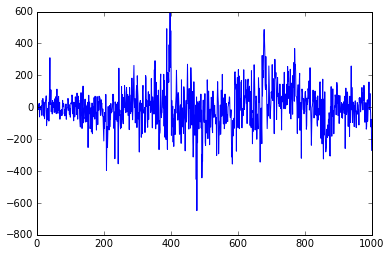

In [64]:
plt.plot(result[0][6])

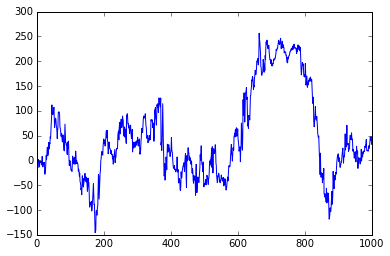

In [65]:
plt.plot(result[0][7])

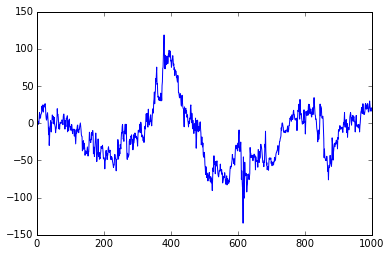

In [66]:
plt.plot(result[0][8])

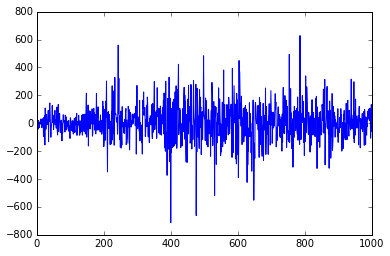

In [67]:
plt.plot(result[0][9])

In [68]:
plt.plot(result[0][10])

IndexError: list index out of range

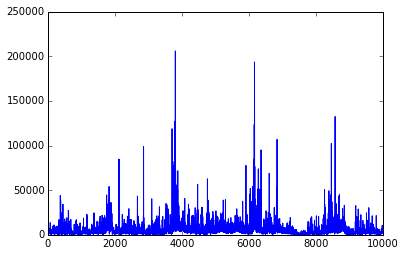

In [69]:
plt.plot(result[1])

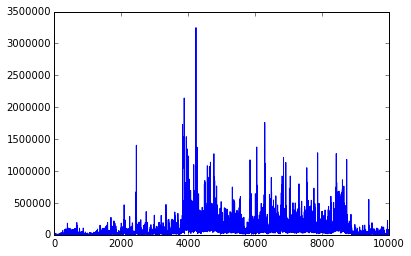

In [70]:
plt.plot(result[2])

In [72]:
np.random.chisquare(df=n)

13.382285761309413

In [73]:
n

16